In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Data_Science_Topics_Survey.csv")

In [3]:
df.head()

,Timestamp,What's your level of interest for the following areas of Data Science? [Data Visualization],What's your level of interest for the following areas of Data Science? [Machine Learning],What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics],What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)],What's your level of interest for the following areas of Data Science? [Data Journalism],What's your level of interest for the following areas of Data Science? [Deep Learning]
0,2017/10/17 1:11:52 PM MDT,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,2017/10/17 2:26:07 PM MDT,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,2017/10/17 2:37:08 PM MDT,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,2017/10/17 2:39:26 PM MDT,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,2017/10/17 2:43:59 PM MDT,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [4]:
df.columns

Index(['Timestamp',
       'What's your level of interest for the following areas of Data Science? [Data Visualization]',
       'What's your level of interest for the following areas of Data Science? [Machine Learning]',
       'What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics]',
       'What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)]',
       'What's your level of interest for the following areas of Data Science? [Data Journalism]',
       'What's your level of interest for the following areas of Data Science? [Deep Learning]'],
      dtype='object')

In [5]:
df=df.rename(columns={"What's your level of interest for the following areas of Data Science? [Data Visualization]":"Data Visualization",
                  "What's your level of interest for the following areas of Data Science? [Machine Learning]":"Machine Learning",
                 "What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics]":"Data Analysis / Statistics",
                "What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)]":"Big Data (Spark / Hadoop)",
                 "What's your level of interest for the following areas of Data Science? [Data Journalism]":"Data Journalism",
                  "What's your level of interest for the following areas of Data Science? [Deep Learning]" :"Deep Learning"
                  })

In [6]:
df=df.drop('Timestamp',axis=1)
df.head()

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop),Data Journalism,Deep Learning
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [7]:
df.shape

(2233, 6)

In [8]:
def temp(i):
    temp_df=df[[i]]
    return temp_df.groupby(i).size().transpose()
l=[]
for i in df.columns:    
    l.append(temp(i))
l

[Data Visualization
 Not interested          102
 Somewhat interested     734
 Very interested        1340
 dtype: int64, Machine Learning
 Not interested           74
 Somewhat interested     477
 Very interested        1629
 dtype: int64, Data Analysis / Statistics
 Not interested           60
 Somewhat interested     444
 Very interested        1688
 dtype: int64, Big Data (Spark / Hadoop)
 Not interested          127
 Somewhat interested     729
 Very interested        1332
 dtype: int64, Data Journalism
 Not interested          610
 Somewhat interested    1081
 Very interested         429
 dtype: int64, Deep Learning
 Not interested          136
 Somewhat interested     770
 Very interested        1263
 dtype: int64]

In [9]:
ds_df=pd.DataFrame(l)

In [10]:
ds_df.index=df.columns

In [11]:
ds_df

,Not interested,Somewhat interested,Very interested
Data Visualization,102,734,1340
Machine Learning,74,477,1629
Data Analysis / Statistics,60,444,1688
Big Data (Spark / Hadoop),127,729,1332
Data Journalism,610,1081,429
Deep Learning,136,770,1263


In [12]:
ds_df=ds_df[['Very interested','Somewhat interested','Not interested']]

In [13]:
ds_df

,Very interested,Somewhat interested,Not interested
Data Visualization,1340,734,102
Machine Learning,1629,477,74
Data Analysis / Statistics,1688,444,60
Big Data (Spark / Hadoop),1332,729,127
Data Journalism,429,1081,610
Deep Learning,1263,770,136


In [14]:
ds_df.sort_values('Very interested',ascending=False,inplace=True)

In [15]:
ds_df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [16]:
ds_df['Very interested']=np.round((ds_df['Very interested']/df.shape[0])*100,2)
ds_df['Somewhat interested']=np.round((ds_df['Somewhat interested']/df.shape[0])*100,2)
ds_df['Not interested']=np.round((ds_df['Not interested']/df.shape[0])*100,2)




In [17]:
ds_df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


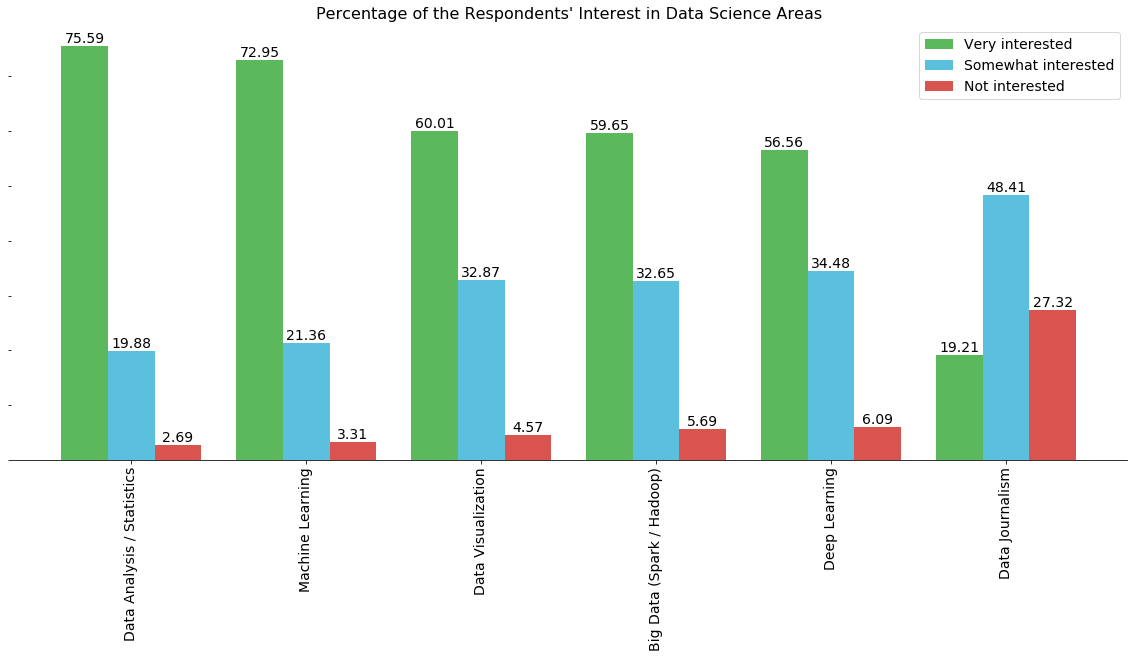

In [31]:
N = 6
ind = np.arange(N)*3  # the x locations for the groups
width = 0.8       # the width of the bars
fig = plt.figure()
plt.rcParams["figure.figsize"] = [20,8]
ax = fig.add_subplot(111)
yvals = ds_df['Very interested']
rects1 = ax.bar(ind, yvals, width, color='#5cb85c')
zvals = ds_df['Somewhat interested']
rects2 = ax.bar(ind+width, zvals, width, color='#5bc0de')
kvals = ds_df['Not interested']
rects3 = ax.bar(ind+width*2, kvals, width, color='#d9534f')
ax.set_xticks(ind+width)
ax.set_xticklabels( ds_df.index ,rotation='vertical',fontsize=14)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Very interested', 'Somewhat interested', 'Not interested') ,fontsize=14)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%.2f'%float(h),
               ha='center', va='bottom',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)                
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
ax.set_title("Percentage of the Respondents' Interest in Data Science Areas", fontsize="16")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.show()


In [29]:
po_df=pd.read_csv("Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [30]:
po_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [71]:
police_df=pd.DataFrame(po_df.groupby("PdDistrict").count()['IncidntNum'])

In [72]:
police_df=police_df.reset_index()


In [73]:
police_df=police_df.rename(columns={"PdDistrict":"Neighborhood",
                         "IncidntNum":"Count"})

In [74]:
police_df

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [93]:
import folium
import pygeoj
#sfo_geo = pygeoj.load("san-francisco.geojson")
sfo_geo ="san-francisco.geojson"  # geojson file


sfo_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)


sfo_map.choropleth(
    geo_data=sfo_geo,
    data=police_df,
    columns=['Neighborhood','Count'],
    key_on='properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San francisco_crime_intensity'
)

# display map
sfo_map

In [92]:
sfo_geo ="san-francisco.geojson" 
sfo_geo = pygeoj.load("san-francisco.geojson")
for feature in sfo_geo:
    print(feature)
    

Feature(geometry=Geometry(type=Polygon, coordinates=[[[-122.40532134644249, 37.806867516866724], [-122.40440122046421, 37.80885380837723], [-122.40438743872008, 37.80886519707406], [-122.40436730880846, 37.808872966044206], [-122.40434376667437, 37.808869624109605], [-122.40431429421082, 37.80881799170733], [-122.40394067997407, 37.80876198999871], [-122.40392016838871, 37.808754877186864], [-122.40390555965932, 37.808734021463344], [-122.40390814512642, 37.80871288836611], [-122.40471878715235, 37.80696905969842], [-122.4039597318324, 37.80657809724], [-122.4027673862454, 37.80801170771318], [-122.40274578869823, 37.80802322234157], [-122.40271771623641, 37.80802615647638], [-122.40269398350013, 37.80801537335998], [-122.40235483855216, 37.8078397060222], [-122.40234023023558, 37.80781885013204], [-122.40234106239043, 37.80779030122836], [-122.40235302718006, 37.80776901688031], [-122.40342063882207, 37.80647141647687], [-122.40280489777783, 37.806024980577334], [-122.4009515465245, 3